In [15]:
import sys

sys.path.append('../data')
sys.path.append('..')
sys.path.append('../inference')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ai_trainer import Personal_Trainer
import squat_separation as ss
import pickle
import os
import random as rnd

%matplotlib inline

#Step 1: Instantiate our personal trainer and load preprocessed data

In [16]:
pt = Personal_Trainer('NeckY')
pt.load_squats(os.path.join('../data/data_sets','multipleClass3.p'))

#Step 2: Extract features 

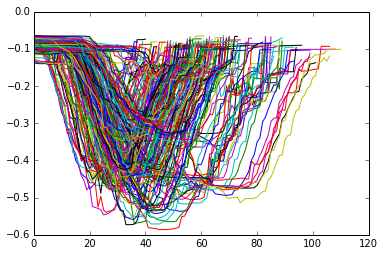

In [17]:
plt.clf()
for squat in pt.get_squats():
    plt.plot(-squat['NeckY'])

In [12]:
X, Y, file_names, feature_vector = pt.extract_advanced_features(toIgnore = [])

#Step 3: Classification

##Scale features and define testing functions

In [18]:
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn import metrics
import random

def predictProbs(X,y,X_test, clf_class, **kwargs):
    clf = clf_class(**kwargs)
    clf.fit(X ,y)
    return clf.predict_proba(X_test)

def predict_labels(X, y, X_test, clf_class, **kwargs):
    clf = clf_class(**kwargs)
    clf.fit(X ,y)
    print "Labels ", clf.classes_
    return clf.predict(X_test)

def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = cross_validation.StratifiedKFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for i, j in stratified_k_fold:
        X_train, X_test = X[i], X[j]
        y_train = y[i]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[j] = clf.predict(X_test)
    return y_pred

def rnd_prediction(training_data, labels, file_names, clf_class, toIgnore=None, num_iters=10, **kwargs):
    
    #=====[ Instantiate our personal trainer for feature extraction ]=====
    accuracy = 0

    #=====[ Randomly leave out one of the files and test on it num_iter times ]======
    names = list(set(file_names))
    for name in names:
         
        toIgnore = name
        squats = []
        
        to_ignore = name
    
        X = [x for index, x in enumerate(training_data) if file_names[index] != toIgnore]
        Y = [y for index, y in enumerate(labels) if file_names[index] != toIgnore]
        
        X_test = [x for index, x in enumerate(training_data) if file_names[index] == toIgnore]
        y_test = [y for index, y in enumerate(labels) if file_names[index] == toIgnore]
        
        local_accuracy = metrics.accuracy_score(y_test, predict_labels(X, Y, X_test, clf_class, **kwargs))
        
        accuracy += local_accuracy
        
#         print predictProbs(X,Y,X_test,clf_class,**kwargs)
        print(toIgnore, local_accuracy)

    print accuracy/len(names), '\n\n'

##Test Various Classifiers

In [19]:
from sklearn import ensemble
from sklearn import svm
from sklearn import neighbors
from sklearn import linear_model

# print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, linear_model.LogisticRegression))))
# print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svm.SVC))))
# print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, ensemble.RandomForestClassifier))))

##Build classifier for each feature set and test against individuals that have no input into the training set

In [6]:
def classify(feature_key, data_dir):
    print('Logistic Regression:           {:.2f}'.format(rnd_prediction(feature_key, data_dir, linear_model.LogisticRegression)))
    print('Support vector machine(SVM):   {:.2f}'.format(rnd_prediction(feature_key, data_dir, svm.SVC)))
    print('Random Forest Classifier:      {:.2f}'.format(rnd_prediction(feature_key, data_dir, ensemble.RandomForestClassifier)))

#Classify on entire training 

In [7]:
for key in X:
    x = X[key]
    y = Y[key]
    print '\n\n', key, '\n#############################'
    try:
        print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(x, y, linear_model.LogisticRegression))))
        print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(x, y, svm.SVC))))
        print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(x, y, ensemble.RandomForestClassifier))))
    except Exception as e:
        print e

NameError: name 'X' is not defined

#Classify with file_names left out

In [8]:
for key in X:
    x = X[key]
    y = Y[key]
    try:
        print '\n\n', key, '\n#############################\n\n'
        print 'Logistic Regression'
        rnd_prediction(x, y, file_names, linear_model.LogisticRegression)
        print 'SVM'
        rnd_prediction(x, y, file_names, svm.SVC)
        print 'Random Forest Classifier'
        rnd_prediction(x, y, file_names, ensemble.RandomForestClassifier)
    except Exception as e:
        print key, e

NameError: name 'X' is not defined

#Classify with entire feature set

In [20]:
X, Y, file_names = pt.extract_all_advanced_features(toIgnore=[])

In [21]:
toIgnore = ['stance_width', 'back_straight','back_hip_angle']

for key in Y:
    y = Y[key]
    try:
        print '\n\n', key, '\n#############################\n\n'
        print 'Logistic Regression'
        rnd_prediction(X, y, file_names, linear_model.LogisticRegression)
        print 'SVM'
        rnd_prediction(X, y, file_names, svm.SVC)
        print 'Random Forest Classifier'
        rnd_prediction(X, y, file_names, ensemble.RandomForestClassifier)
    except Exception as e:
        print key, e



stance_width 
#############################


Logistic Regression
Labels  [-1  0]
('squats14.p', 0.0)
Labels  [-1  0]
('squats45_46.p', 1.0)
Labels  [-1  0]
('squats33_34.p', 1.0)
Labels  [-1  0]
('squats11.p', 1.0)
Labels  [-1  0]
('squats31_32.p', 0.55555555555555558)
Labels  [-1  0]
('squats15.p', 1.0)
Labels  [-1  0]
('squats16.p', 0.90000000000000002)
Labels  [-1  0]
('squats47.p', 1.0)
Labels  [-1  0]
('squats19.p', 1.0)
Labels  [-1  0]
('squats43_44.p', 0.94999999999999996)
Labels  [-1  0]
('squats35.p', 0.88888888888888884)
Labels  [-1  0]
('squats13.p', 0.10000000000000001)
Labels  [-1  0]
('squats20.p', 0.77777777777777779)
Labels  [-1  0]
('squats12.p', 0.80000000000000004)
Labels  [-1  0]
('squats17.p', 0.72727272727272729)
Labels  [-1  0]
('squats41_42.p', 1.0)
0.793718434343 


SVM
Labels  [-1  0]
('squats14.p', 0.0)
Labels  [-1  0]
('squats45_46.p', 1.0)
Labels  [-1  0]
('squats33_34.p', 1.0)
Labels  [-1  0]
('squats11.p', 1.0)
Labels  [-1  0]
('squats31_32.p', 1.0)
La

In [5]:
import classification
pt = Personal_Trainer('NeckY')
pt.load_squats(os.path.join('../data/data_sets','multipleClass3.p'))

In [6]:
pt.set_classifiers(classification.get_classifiers(pt))

stance_alignment This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0
stance_alignment The number of classes has to be greater than one; got 1


In [7]:
squats = pt.analyze_squats('squatData15.txt')

10


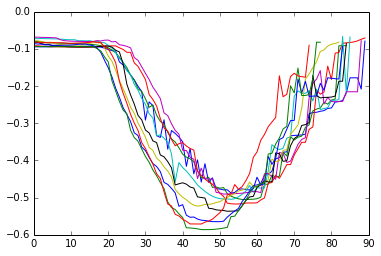

In [8]:
print len(squats)
plt.clf()
for squat in squats:
    plt.plot(-squat['NeckY'])

In [9]:
features, keys = pt.get_prediction_features(squats)

In [14]:
for key in keys:
    print key,':', pt.classify(key, features),'\n'

stance_width : [-1  0]
[ 0  0 -1  0 -1  0  0  0  0  0] 

stance_alignment : [0]
[0 0 0 0 0 0 0 0 0 0] 

back_straight : [0 1 2]
[0 1 0 2 0 0 0 0 0 0] 

bend_hips_knees : [0 1]
[0 0 0 0 0 0 0 0 0 0] 

squat_depth : [-1  0  1]
[0 0 0 0 0 0 0 0 0 0] 

knees_over_toes : [0 1]
[0 1 0 0 0 0 0 0 0 0] 

head_alignment : [0 1]
[0 0 1 0 1 1 1 0 0 0] 

